In [2]:
import torch
import csv
import os
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch.utils.data as data

from torchvision import datasets, transforms
from torch.autograd import Variable

os.chdir("d:/Projects/ML_Pipeline")

%matplotlib inline

## Download Dataset

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nelgiriyewithana/new-york-housing-market")

print(f"Dataset downloaded at {path}"   )


d:\Projects\ML_Pipeline\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Dataset downloaded at C:\Users\Presmanes\.cache\kagglehub\datasets\nelgiriyewithana\new-york-housing-market\versions\1


# Explore data

In [4]:
df = pd.read_csv(r"./data/raw/NY-House-Dataset.csv")

df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

In [6]:
df.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4.801000e+03,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000
mean,2.356940e+06,3.356801,2.373861,2184.207862,40.714227,-73.941601
std,3.135525e+07,2.602315,1.946962,2377.140894,0.087676,0.101082
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.253033
25%,4.990000e+05,2.000000,1.000000,1200.000000,40.639375,-73.987143
50%,8.250000e+05,3.000000,2.000000,2184.207862,40.726749,-73.949189
75%,1.495000e+06,4.000000,3.000000,2184.207862,40.771923,-73.870638
max,2.147484e+09,50.000000,50.000000,65535.000000,40.912729,-73.702450


## Raw Feature

### Null Values

In [7]:
df.isnull().sum()

BROKERTITLE                    0
TYPE                           0
PRICE                          0
BEDS                           0
BATH                           0
PROPERTYSQFT                   0
ADDRESS                        0
STATE                          0
MAIN_ADDRESS                   0
ADMINISTRATIVE_AREA_LEVEL_2    0
LOCALITY                       0
SUBLOCALITY                    0
STREET_NAME                    0
LONG_NAME                      0
FORMATTED_ADDRESS              0
LATITUDE                       0
LONGITUDE                      0
dtype: int64

### Distribution of numerical features

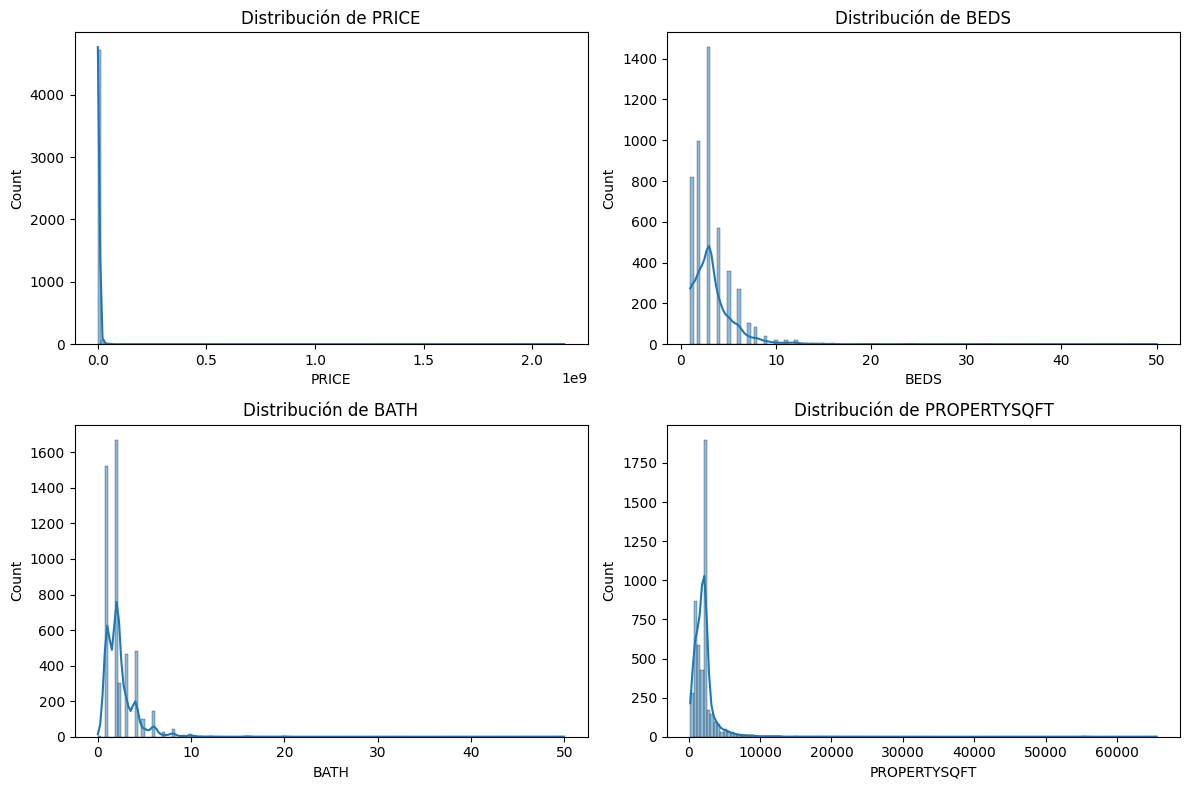

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.histplot(df['PRICE'], ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Distribución de PRICE')

sns.histplot(df['BEDS'], ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Distribución de BEDS')

sns.histplot(df['BATH'], ax=axes[1, 0], kde=True)
axes[1, 0].set_title('Distribución de BATH')

sns.histplot(df['PROPERTYSQFT'], ax=axes[1, 1], kde=True)
axes[1, 1].set_title('Distribución de PROPERTYSQFT')

plt.tight_layout()
plt.show()

### Outliers in numerical features

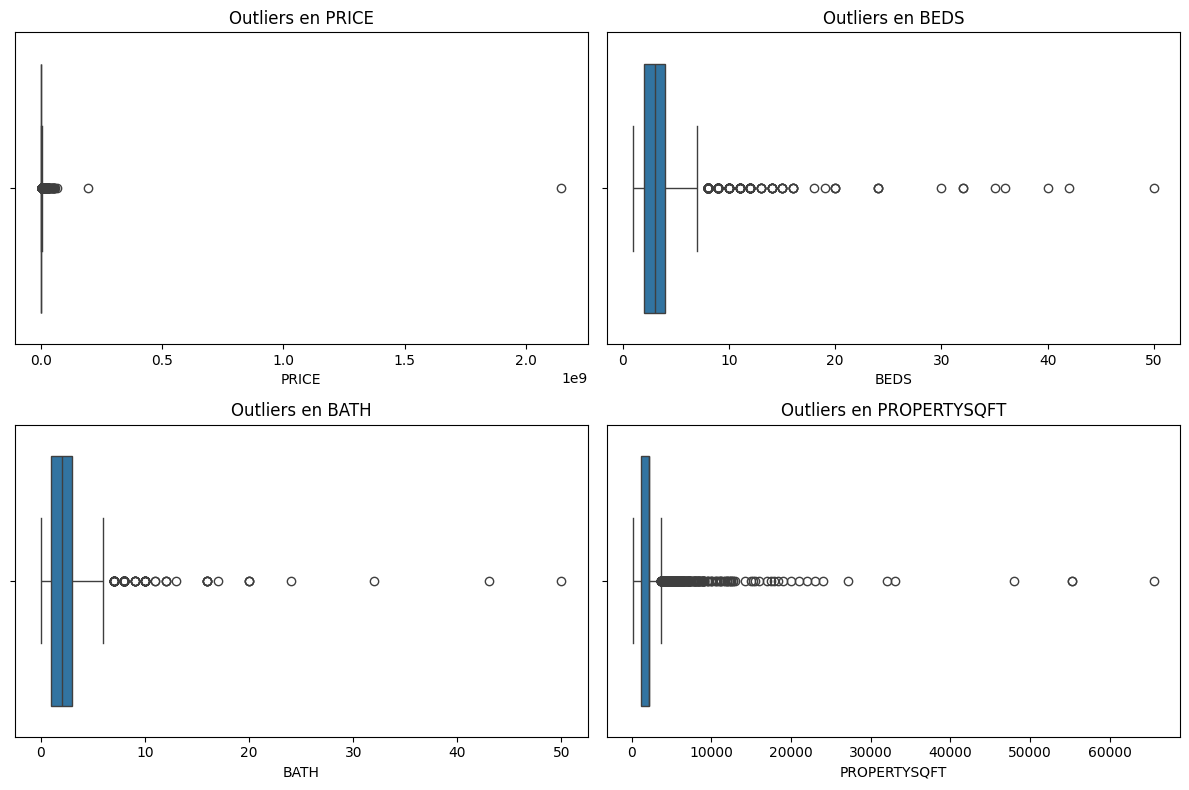

In [9]:
features = ['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
for i, feature in enumerate(features):
    row, col = divmod(i, 2)
    sns.boxplot(x=df[feature], ax=axes[row, col])
    axes[row, col].set_title(f'Outliers en {feature}')

plt.tight_layout()
plt.show()

### Correlation Matrix

In [10]:
num_vars = ["PRICE", "BEDS", "BATH", "PROPERTYSQFT"]
corr_matrix = df[num_vars].corr(method="pearson")  # Pearson es lo más común
print(corr_matrix)

                 PRICE      BEDS      BATH  PROPERTYSQFT
PRICE         1.000000  0.052189  0.079371      0.110889
BEDS          0.052189  1.000000  0.776447      0.420503
BATH          0.079371  0.776447  1.000000      0.483935
PROPERTYSQFT  0.110889  0.420503  0.483935      1.000000


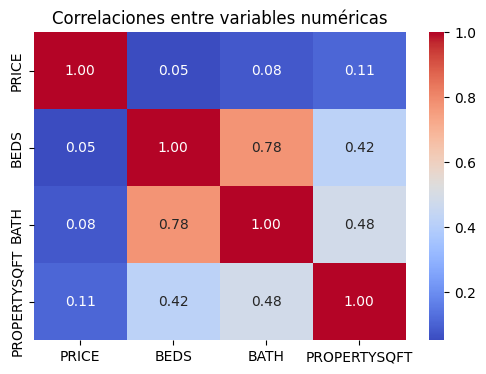

In [11]:
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlaciones entre variables numéricas")
plt.show()

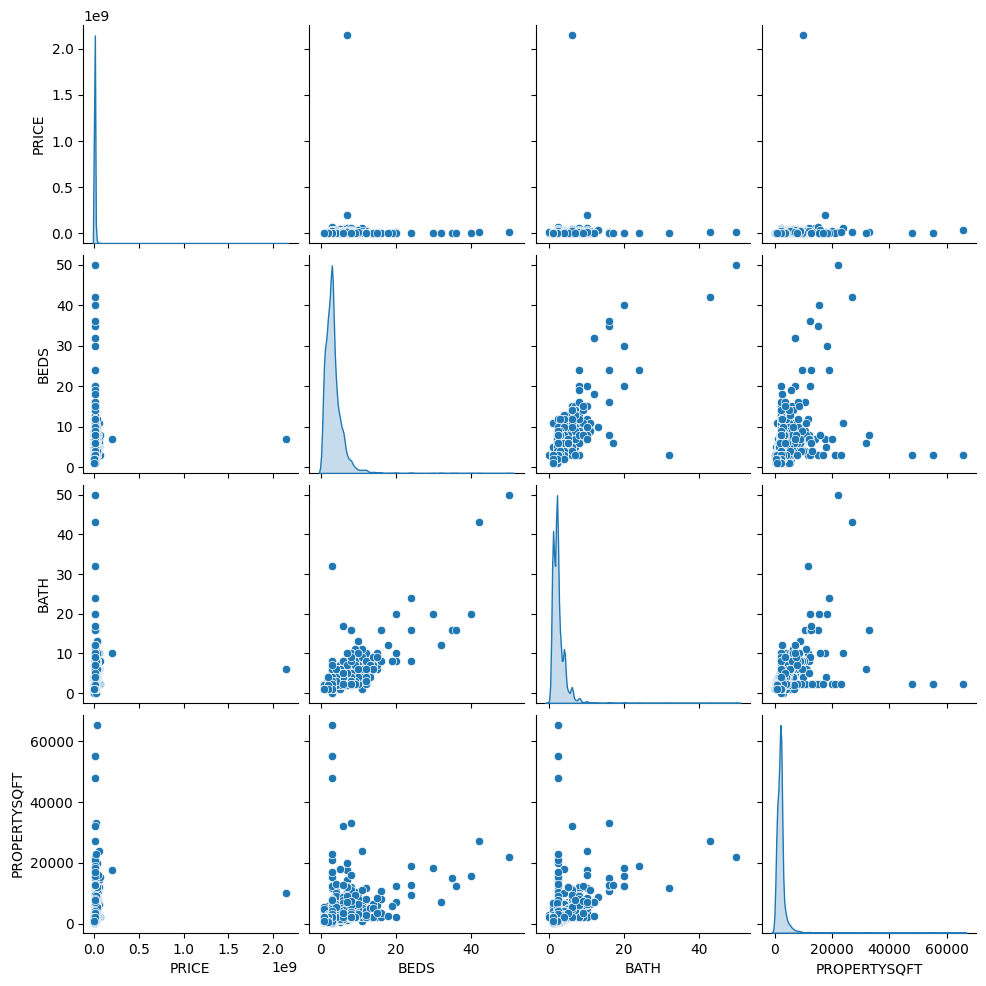

In [12]:
sns.pairplot(df[num_vars], diag_kind="kde")
plt.show()

## Clean Up

In [13]:
df["PRICE_LOG"] = np.log1p(df["PRICE"])
df["SQFT_LOG"] = np.log1p(df["PROPERTYSQFT"])

In [14]:
n_total = len(df)
df = df[df["PRICE"] < df["PRICE"].quantile(0.99)]

n_after = len(df)

removed = n_total - n_after
print(f"Removed {n_total - n_after} outliers based on PRICE ({removed / n_total:.2%} of total)")

Removed 50 outliers based on PRICE (1.04% of total)


In [15]:
# before_filtering
n_total = len(df)

# Drop beds and baths outliers
df = df[(df["BEDS"] <= 10) & (df["BATH"] <= 10)]

# Después de filtrar
n_after = len(df)

# Porcentaje de outliers eliminados
removed = n_total - n_after
print(f"Removed {removed} properties ({removed/n_total:.2%} from total)")

Removed 82 properties (1.73% from total)


### Distribution of numerical features

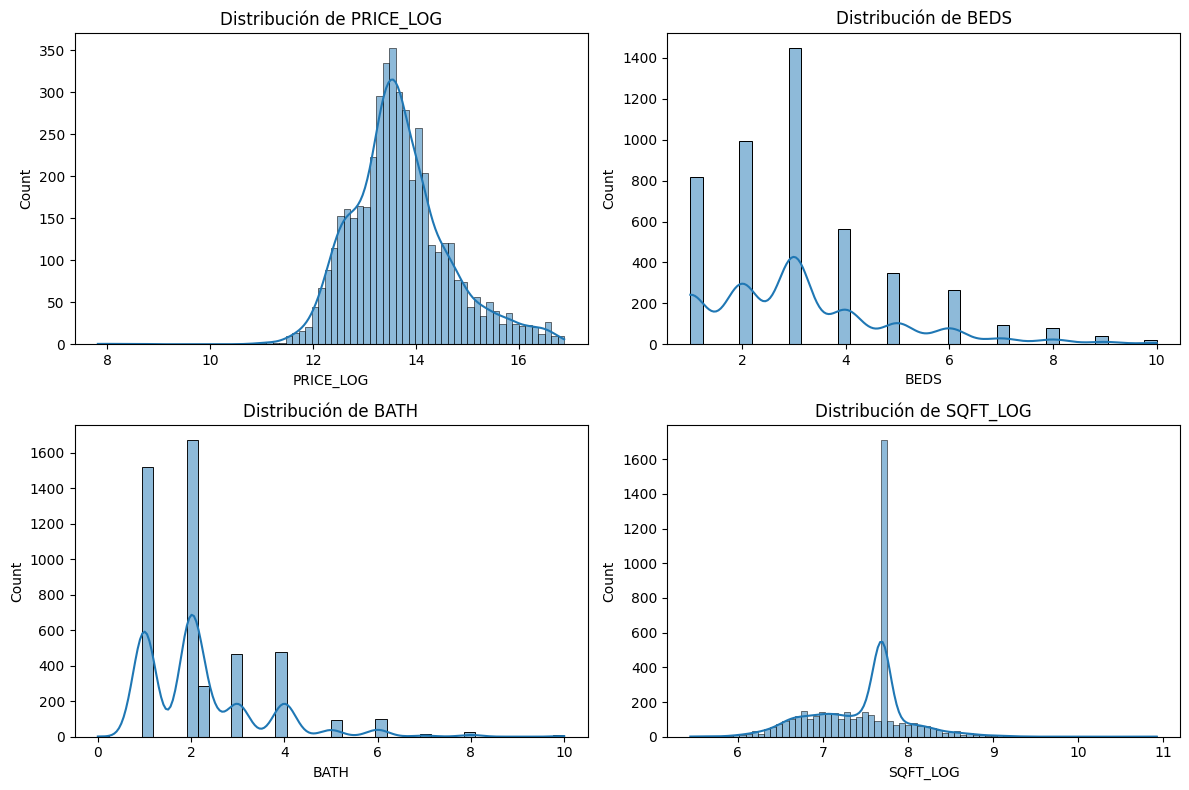

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.histplot(df['PRICE_LOG'], ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Distribución de PRICE_LOG')

sns.histplot(df['BEDS'], ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Distribución de BEDS')

sns.histplot(df['BATH'], ax=axes[1, 0], kde=True)
axes[1, 0].set_title('Distribución de BATH')

sns.histplot(df['SQFT_LOG'], ax=axes[1, 1], kde=True)
axes[1, 1].set_title('Distribución de SQFT_LOG')

plt.tight_layout()
plt.show()

### Correlation Matrix

In [17]:
num_vars = ["PRICE_LOG", "BEDS", "BATH", "SQFT_LOG"]
corr_matrix = df[num_vars].corr(method="pearson")  # Pearson es lo más común
print(corr_matrix)

           PRICE_LOG      BEDS      BATH  SQFT_LOG
PRICE_LOG   1.000000  0.463596  0.626902  0.554138
BEDS        0.463596  1.000000  0.706947  0.525314
BATH        0.626902  0.706947  1.000000  0.553647
SQFT_LOG    0.554138  0.525314  0.553647  1.000000


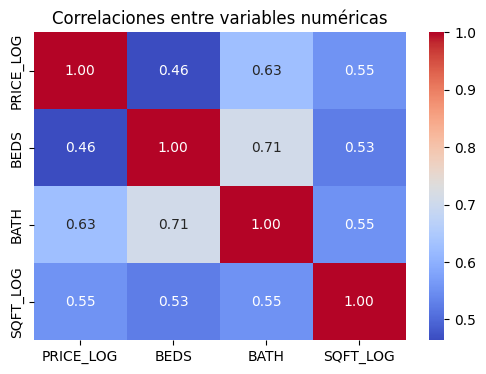

In [18]:
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlaciones entre variables numéricas")
plt.show()

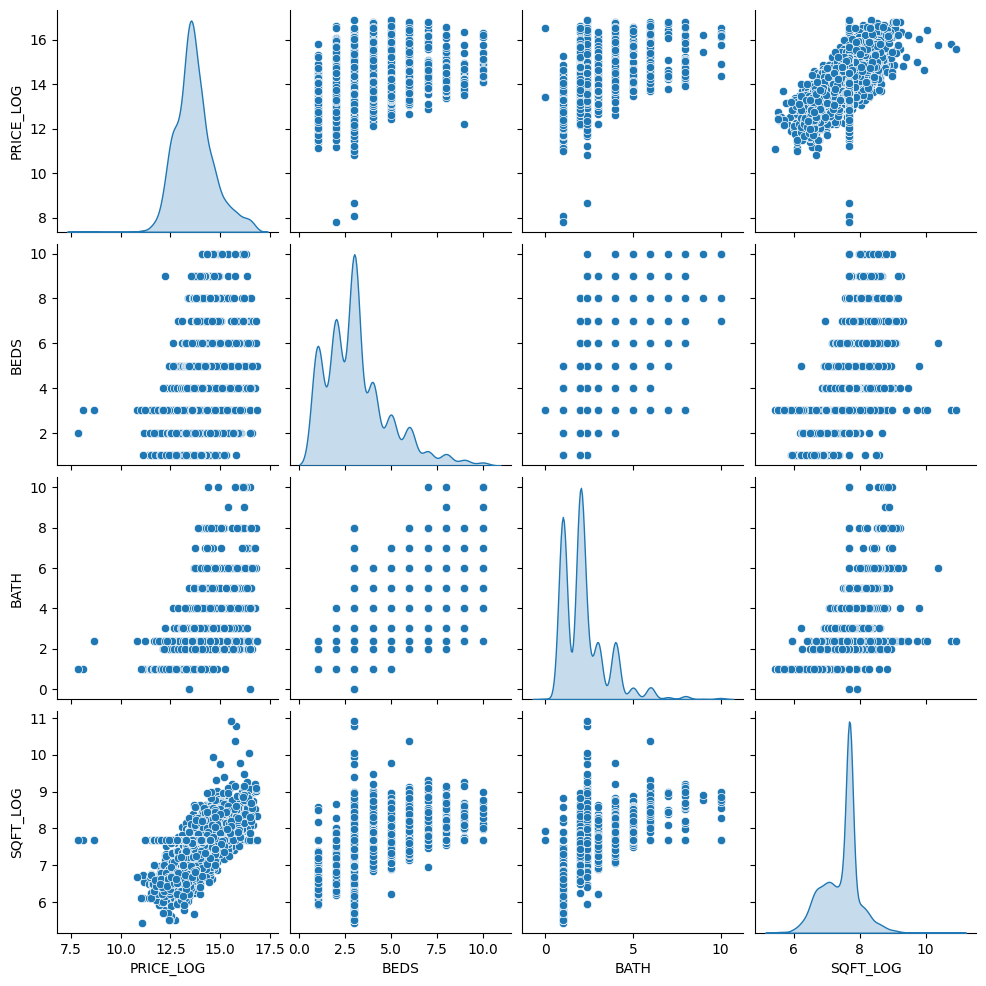

In [19]:
sns.pairplot(df[num_vars], diag_kind="kde")
plt.show()

# Fature Engineering

## Extraction

### Price per sqft

In [ ]:
df["PRICE_PER_SQFT"] = df["PRICE"] / df["PROPERTYSQFT"]

### Distance to Manhattan

In [23]:
lat_c, lon_c = 40.7831, -73.9712

df["DIST_TO_MANHATTAN"] = np.sqrt(
    (df["LATITUDE"] - lat_c) ** 2 + (df["LONGITUDE"] - lon_c) ** 2
)

### Locality

In [24]:
# Definir top-N zonas
top_n = 10
top_localities = df["LOCALITY"].value_counts().nlargest(top_n).index

# Crear nueva columna
df["LOCALITY_GROUPED"] = df["LOCALITY"].apply(
    lambda x: x if x in top_localities else "Other"
)

print(df["LOCALITY_GROUPED"].value_counts())


LOCALITY_GROUPED
New York           2396
New York County     964
Queens County       556
Kings County        460
Bronx County        182
Richmond County      58
United States        35
Queens                6
Brooklyn              6
The Bronx             5
Other                 1
Name: count, dtype: int64


## Plotting

### Price per sqft plot

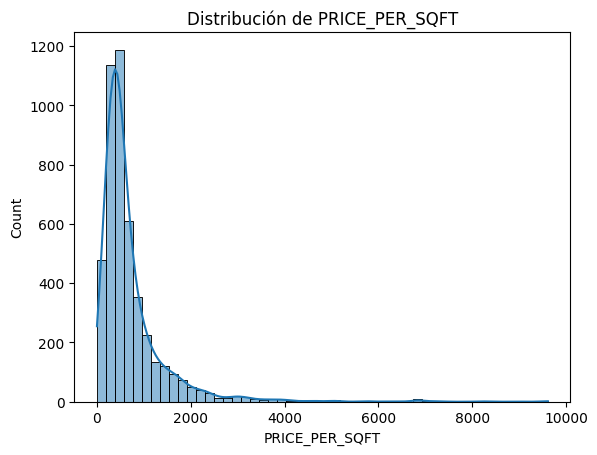

In [25]:
sns.histplot(df["PRICE_PER_SQFT"], bins=50, kde=True)
plt.title("Distribución de PRICE_PER_SQFT")
plt.show()

### Price per sqft vs locality

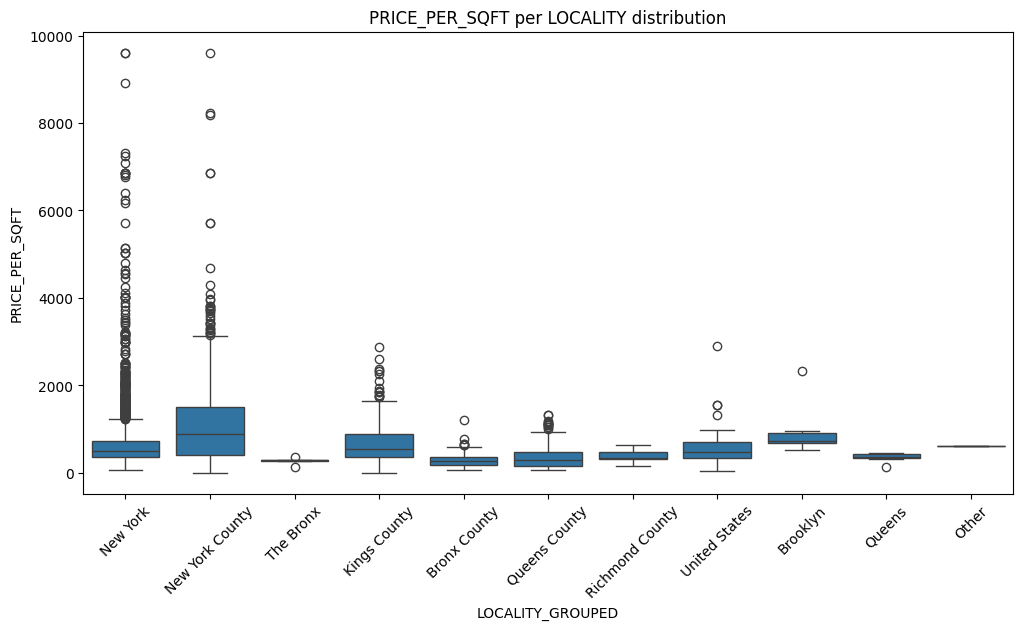

In [28]:
plt.figure(figsize=(12,6))
sns.boxplot(x="LOCALITY_GROUPED", y="PRICE_PER_SQFT", data=df)
plt.xticks(rotation=45)
plt.title("PRICE_PER_SQFT per LOCALITY distribution")
plt.show()

### Distance to Manhattan

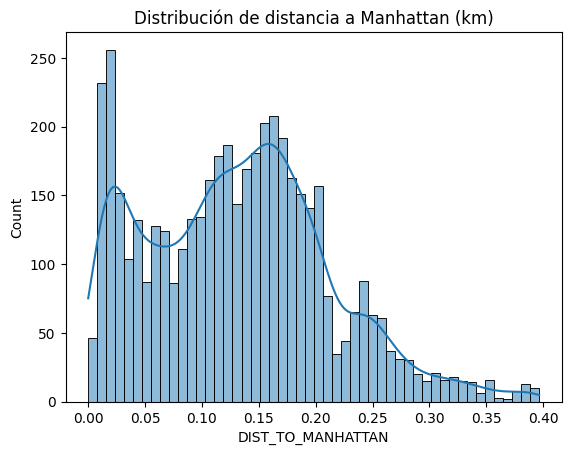

In [27]:
sns.histplot(df["DIST_TO_MANHATTAN"], bins=50, kde=True)
plt.title("Distribución de distancia a Manhattan (km)")
plt.show()

### Distance to manhattan vs price_log

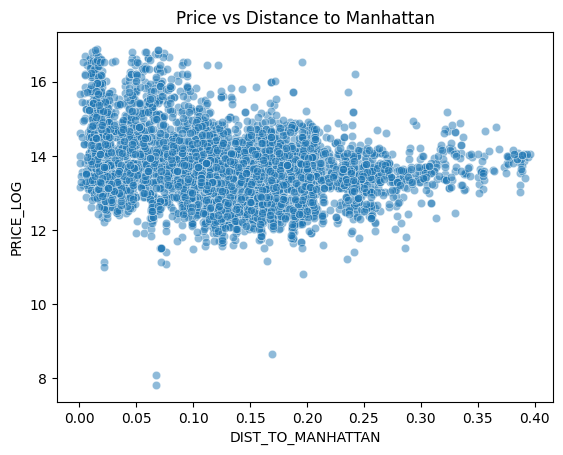

In [30]:
sns.scatterplot(x="DIST_TO_MANHATTAN", y="PRICE_LOG", alpha=0.5, data=df)
plt.title("Price vs Distance to Manhattan")
plt.show()


### Price log per location

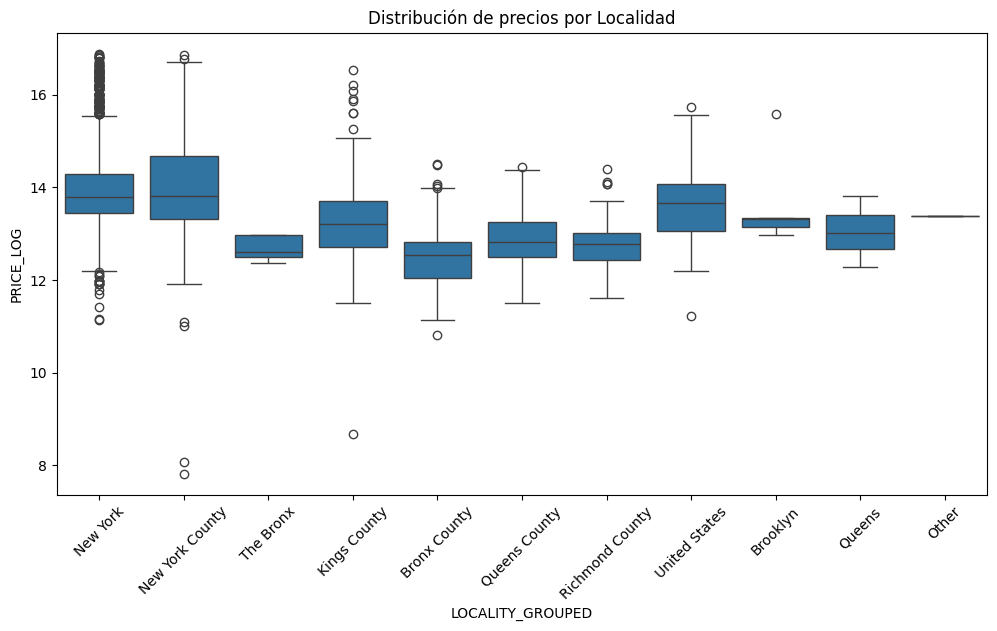

In [31]:
plt.figure(figsize=(12,6))
sns.boxplot(x="LOCALITY_GROUPED", y="PRICE_LOG", data=df)
plt.xticks(rotation=45)
plt.title("Distribución de precios por Localidad")
plt.show()
